In [1]:
from SedraHPB import SedraHPB
import sympy as sp
import numpy as np

# Create a SedraHPB object
wzero = 22722.16 # rad/s
wpole = 72603.65
Q = 1.492215039916194


sedra = SedraHPB(w0=wpole, Q=Q, wz=wzero)

def iterate(values={}):
    n2_sedra = 0.5
    sedra.setDesignParams(Q0=values["Q0"], n2=n2_sedra)
    sedra.setBaseComponentValues(Rb=values["Rb"], C=values["C"])

    sedra.computeDesignParams()
    sedra.computeComponentValues()    
    sedra.calculateSensTables()
    # print(f"\nSQ = {sedra.Q_sen_sum:.5f}   w0 = {sedra.w0_sen_sum:.5f}   wz = {sedra.wz_sen_sum:.5f}  " + str(values))
    return sedra.Q_sen_sum, sedra.w0_sen_sum, sedra.wz_sen_sum


# H, s = iterate({"Q0": Q/1.2, "Rb": 560, "C": 10e-9, })

import pandas as pd
df_params = pd.DataFrame(columns=["$Q_0$", "$R_b [Ω]$", "C", "$E_Q$", "$E_{{\\omega_0}}$", "$E_{{\\omega_z}}$", "$E_{{tot}}$"])

# list_Q_Q0 = [0.2, 0.4, 0.6, 0.8, 0.9, 1.1, 1.2, 1.4, 1.6, 1.8]
# e12_series = [1.0, 1.2, 1.5, 1.8, 2.2, 2.7, 3.3, 3.9, 4.7, 5.6, 6.8, 8.2]
# c_exps = [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
# r_exps = [1e2, 1e3, 1e4, 1e5]

for i in range(1, 10000):
    # Q0 = np.random.choice(list_Q_Q0) * Q
    # Q0 = float(f"{Q0:.2f}")

    # Rb = np.random.choice(e12_series) * np.random.choice(r_exps)
    # C = np.random.choice(e12_series) * np.random.choice(c_exps)

    Q0 = Q
    C = 10**np.random.uniform(-10, -5)
    Rb = 10**np.random.uniform(2, 5)
    while np.abs(Q0 - Q) < 0.01:
        Q0 = np.random.uniform(0.6, 2) * Q
    sQ, Sw0, Swz = iterate({"Q0": Q0, "Rb": Rb, "C": C})
    df_params.loc[i] = [Q0, Rb, C, sQ, Sw0, Swz, sQ + Sw0 + Swz]

print(df_params.info())
print(df_params.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 1 to 9999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   $Q_0$             9999 non-null   float64
 1   $R_b [Ω]$         9999 non-null   float64
 2   C                 9999 non-null   float64
 3   $E_Q$             9999 non-null   float64
 4   $E_{{\omega_0}}$  9999 non-null   float64
 5   $E_{{\omega_z}}$  9999 non-null   float64
 6   $E_{{tot}}$       9999 non-null   float64
dtypes: float64(7)
memory usage: 624.9 KB
None
      $Q_0$     $R_b [Ω]$             C     $E_Q$  $E_{{\omega_0}}$  \
1  1.604372    100.253424  1.182873e-09  0.017902              0.11   
2  2.247181    681.361815  4.775491e-06  0.044247              0.11   
3  2.280802  35936.045157  3.838556e-08  0.045216              0.11   
4  2.104825   8059.470122  4.214958e-09  0.039799              0.11   
5  1.054611    280.268066  2.927231e-07  0.068092              0.11  

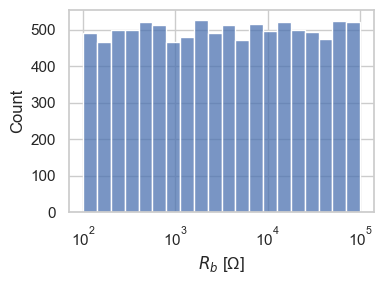

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", rc={'figure.figsize':(4, 3)})
# perform logscale scatter plot
g = sns.histplot(data=df_params, x="$R_b [Ω]$", bins=20, log_scale=True, element="bars")
g.set_xlabel("$R_b$ [Ω]")

plt.tight_layout()
plt.savefig("sedra_sens_hist_Rb.pdf", bbox_inches='tight')

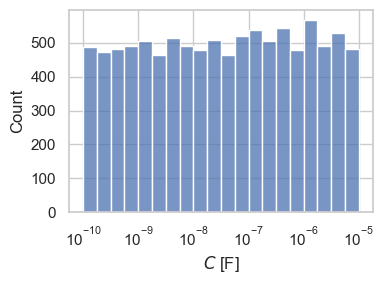

In [3]:
g = sns.histplot(data=df_params, x="C", bins=20, log_scale=True)
g.set_xlabel("$C$ [F]")
g.set_xticks([1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5])

plt.tight_layout()
plt.savefig("sedra_sens_hist_C.pdf", bbox_inches='tight')

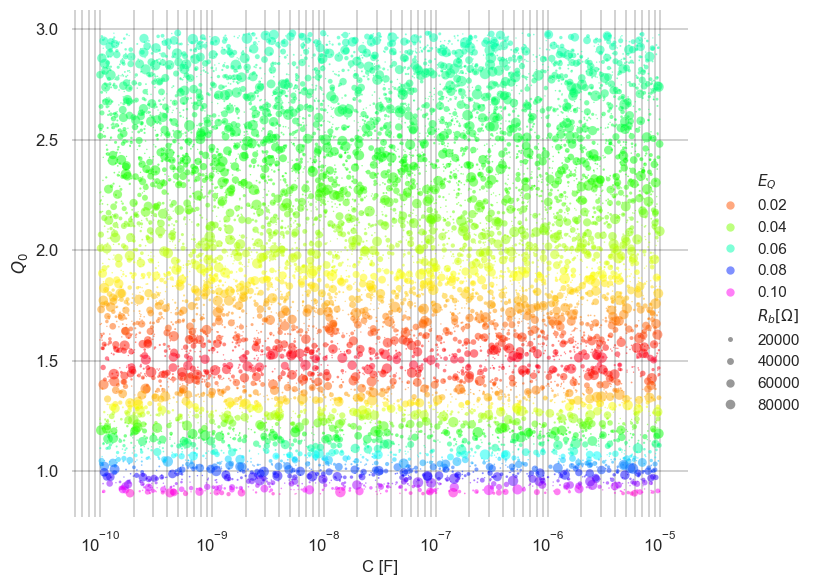

In [5]:
# perform relplot
var = "$E_Q$"
# var = "$E_{{\\omega_0}}$"
# palette = "gist_ncar"
palette = "gist_rainbow"
sns.set_theme(style="whitegrid")
g = sns.relplot(data=df_params, x="C", y="$Q_0$", hue=var, size="$R_b [Ω]$", 
                palette=palette, sizes=(1, 60), alpha=0.5,
                height=6, aspect=1.2, legend=True) # , edgecolor=None
g.set(xscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25, color='black', alpha=0.4)
g.ax.xaxis.grid(True, "major", linewidth=.25, color='black', alpha=.8)
g.ax.yaxis.grid(True, "major", linewidth=.25, color='black', alpha=.8)
g.despine(left=True, bottom=True)
g.set_xlabels("C [F]")
g.set_ylabels("$Q_0$")
g.tight_layout()
g.tick_params(axis='both', which='both', labelsize=12, color='black', grid_alpha=1)
# Add colorbar
# norm = plt.Normalize(df_params[var].min(), df_params[var].max())
# sm = plt.cm.ScalarMappable(cmap=palette, norm=norm)
# sm.set_array([])

# The line below adds the colorbar to the right
# g.fig.colorbar(sm, ax=g.axes.ravel().tolist(), label=var)

# g.savefig("sedra_sens_analysis_Ew0.pdf", bbox_inches='tight')

<AxesSubplot:xlabel='$Q_0$', ylabel='$E_{{tot}}$'>

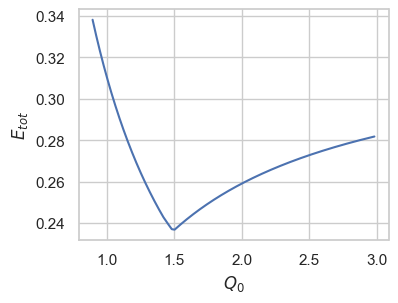

In [6]:
sns.lineplot(data=df_params, x="$Q_0$", y="$E_{{tot}}$")